# Project identifying what game factors determine the Best PGA wins and Top_10 finishes from 2010 to 2018
In this notebook, we're going to create a machine learning model that predicts which game factors on the PGA tour is most desirable for winning, utilizing criteria from Kaggle's PGA tour data.
## 1. Problem definition:
What are the most important game factors for PGA tour Wins and Top_10 finishes.
## 2. Data:
The data is downloaded from Kaggle: https://www.kaggle.com/jmpark746/pga-tour-data-2010-2018
## 3. Evaluation:
The evaluation metric will be determined by the model evaluating the best feature importances.
## 4. Features:
Kaggle provides a data list of 18 columns for data (see the link above)

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [272]:
# Import data for project
df = pd.read_csv('pgaTourData.csv')

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [274]:
df.isna().sum()

Player Name              0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top 10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

In [275]:
df.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')

In [276]:
df.head().T

,0,1,2,3,4
Player Name,Henrik Stenson,Ryan Armour,Chez Reavie,Ryan Moore,Brian Stuard
Rounds,60,109,93,78,103
Fairway Percentage,75.19,73.58,72.24,71.94,71.44
Year,2018,2018,2018,2018,2018
Avg Distance,291.5,283.5,286.5,289.2,278.9
gir,73.51,68.22,68.67,68.8,67.12
Average Putts,29.93,29.31,29.12,29.17,29.11
Average Scrambling,60.67,60.13,62.27,64.16,59.23
Average Score,69.617,70.758,70.432,70.015,71.038
Points,868,"1,006","1,020",795,421


In [277]:
# Rename Player Columns and Top 10 without spaces
df.rename(columns = {'Player Name':'Player'}, inplace = True)
df.rename(columns = {'Top 10':'Top_10'}, inplace = True)
df.head().T

,0,1,2,3,4
Player,Henrik Stenson,Ryan Armour,Chez Reavie,Ryan Moore,Brian Stuard
Rounds,60,109,93,78,103
Fairway Percentage,75.19,73.58,72.24,71.94,71.44
Year,2018,2018,2018,2018,2018
Avg Distance,291.5,283.5,286.5,289.2,278.9
gir,73.51,68.22,68.67,68.8,67.12
Average Putts,29.93,29.31,29.12,29.17,29.11
Average Scrambling,60.67,60.13,62.27,64.16,59.23
Average Score,69.617,70.758,70.432,70.015,71.038
Points,868,"1,006","1,020",795,421


In [278]:
# Look at One Player
df[df.Player == ("Dustin Johnson")]

,Player,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top_10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
124,Dustin Johnson,77.0,59.46,2018,314.0,70.57,28.47,62.50,68.698,"2,717",3.0,10.0,0.385,2.372,0.919,0.829,0.238,"$8,457,352"
336,Dustin Johnson,77.0,56.44,2017,314.4,69.61,29.00,62.63,69.549,"2,466",3.0,7.0,0.019,1.972,1.071,0.670,0.121,"$8,732,193"
520,Dustin Johnson,87.0,57.17,2016,313.6,67.82,28.49,59.58,69.172,"2,701",2.0,12.0,0.328,1.993,1.117,0.477,0.070,"$9,365,185"
732,Dustin Johnson,75.0,55.53,2015,317.7,67.05,28.47,57.85,69.585,"1,718",1.0,8.0,0.128,1.455,0.960,0.579,-0.212,"$5,509,467"
898,Dustin Johnson,58.0,57.18,2014,311.0,68.03,28.74,59.76,69.546,"1,769",1.0,7.0,0.082,1.331,0.730,0.533,-0.015,"$4,249,180"
1099,Dustin Johnson,71.0,53.36,2013,305.8,66.75,29.40,53.22,70.115,"1,226",1.0,5.0,-0.101,0.805,0.332,0.663,-0.090,"$2,963,214"
1266,Dustin Johnson,70.0,56.30,2012,310.2,65.75,28.64,60.29,69.564,"1,097",1.0,5.0,0.185,1.509,0.720,0.638,-0.035,"$3,393,820"
1446,Dustin Johnson,72.0,57.17,2011,314.2,68.39,29.56,51.24,70.457,"1,191",NaN,5.0,-0.549,0.576,0.912,0.195,0.019,"$4,309,961"
1657,Dustin Johnson,83.0,56.35,2010,308.5,67.95,29.37,55.81,70.135,"1,362",1.0,5.0,0.112,0.979,0.760,0.288,-0.179,"4,473,122"


In [279]:
# Sort DataFrame in date order
df.sort_values(by=["Year"], inplace=True, ascending=True)
df.Year.head(20)

2311    2010
1607    2010
1608    2010
1609    2010
1610    2010
1611    2010
1612    2010
1613    2010
1614    2010
1615    2010
1606    2010
1616    2010
1618    2010
1619    2010
1620    2010
1621    2010
1622    2010
1623    2010
1624    2010
1625    2010
Name: Year, dtype: int64

### Make a copy of the original dataframe
So when we manipulate the copy, we've still got our original data. 

In [280]:
# Make a copy of the original dataframe to perform edits on.
df_tmp = df.copy()

In [281]:
# Check the values of different comlumns
df_tmp.Points.value_counts()

1        25
2        23
9        15
3        15
4        15
         ..
1,057     1
2,717     1
920       1
998       1
294       1
Name: Points, Length: 1039, dtype: int64

In [282]:
df_tmp.head()

,Player,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top_10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
2311,"Jim Gallagher, Jr.",NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,552"
1607,Freddie Jacobson,83.0,62.16,2010,283.1,67.80,28.93,63.20,70.367,826,NaN,3.0,0.241,0.722,-0.064,0.302,0.241,"1,666,252"
1608,Matt Every,60.0,62.06,2010,290.9,64.75,28.93,57.61,70.986,322,NaN,1.0,0.240,-0.073,0.166,-0.292,-0.185,"456,847"
1609,Steve Marino,81.0,61.96,2010,290.6,67.49,29.53,56.33,70.875,636,NaN,2.0,0.261,0.567,0.270,-0.016,0.053,"1,479,239"
1610,Steve Lowery,67.0,61.90,2010,286.2,65.52,30.03,50.38,72.202,67,NaN,NaN,-0.386,-1.177,0.122,-0.310,-0.607,"118,602"


In [283]:
len(df_tmp)

2312

## Manipulate the Data into numbers

In [284]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 2311 to 0
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top_10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [285]:
df_tmp["Player"].dtype

dtype('O')

In [286]:
df_tmp.isna().sum()

Player                   0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top_10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

### Convert string into categories
One way we can turn all of our data into numbers is by converting them into pandas categories.

In [287]:
df_tmp.head().T

,2311,1607,1608,1609,1610
Player,"Jim Gallagher, Jr.",Freddie Jacobson,Matt Every,Steve Marino,Steve Lowery
Rounds,NaN,83,60,81,67
Fairway Percentage,NaN,62.16,62.06,61.96,61.9
Year,2010,2010,2010,2010,2010
Avg Distance,NaN,283.1,290.9,290.6,286.2
gir,NaN,67.8,64.75,67.49,65.52
Average Putts,NaN,28.93,28.93,29.53,30.03
Average Scrambling,NaN,63.2,57.61,56.33,50.38
Average Score,NaN,70.367,70.986,70.875,72.202
Points,NaN,826,322,636,67


In [288]:
pd.api.types.is_string_dtype(df_tmp["Points"])

True

In [289]:
# Find the columns whick contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Player
Points
Money


In [290]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [291]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 2311 to 0
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Player              2312 non-null   category
 1   Rounds              1678 non-null   float64 
 2   Fairway Percentage  1678 non-null   float64 
 3   Year                2312 non-null   int64   
 4   Avg Distance        1678 non-null   float64 
 5   gir                 1678 non-null   float64 
 6   Average Putts       1678 non-null   float64 
 7   Average Scrambling  1678 non-null   float64 
 8   Average Score       1678 non-null   float64 
 9   Points              2296 non-null   category
 10  Wins                293 non-null    float64 
 11  Top_10              1458 non-null   float64 
 12  Average SG Putts    1678 non-null   float64 
 13  Average SG Total    1678 non-null   float64 
 14  SG:OTT              1678 non-null   float64 
 15  SG:APR              1678 non-null   fl

In [292]:
df_tmp.Player.cat.categories

Index(['Aaron Baddeley', 'Aaron Watkins', 'Aaron Wise', 'Abraham Ancer',
       'Adam Hadwin', 'Adam Schenk', 'Adam Scott', 'Alex Aragon', 'Alex Cejka',
       'Alex Noren',
       ...
       'Woody Austin', 'Xander Schauffele', 'Xinjun Zhang', 'Y.E. Yang',
       'Zac Blair', 'Zach Johnson', 'Zack Miller', 'Zack Sucher',
       'Zecheng Dou', 'Ángel Cabrera'],
      dtype='object', length=526)

In [293]:
df_tmp.Player.cat.codes

2311    233
1607    169
1608    324
1609    456
1610    455
       ... 
166     117
165     324
164     365
179     484
0       194
Length: 2312, dtype: int16

## Thanks to pandas Categories we now have a way to access all of our data in the form of numbers

## But we still have a bunch of missing data

In [294]:
# Check the missing data
df_tmp.isnull().sum()/len(df_tmp)

Player                0.000000
Rounds                0.274221
Fairway Percentage    0.274221
Year                  0.000000
Avg Distance          0.274221
gir                   0.274221
Average Putts         0.274221
Average Scrambling    0.274221
Average Score         0.274221
Points                0.006920
Wins                  0.873270
Top_10                0.369377
Average SG Putts      0.274221
Average SG Total      0.274221
SG:OTT                0.274221
SG:APR                0.274221
SG:ARG                0.274221
Money                 0.005190
dtype: float64

## Save the preprocessed data

In [295]:
# Export the current tmp dataframe
# df_tmp.to_csv("Desktop/pga-project-folder",
#             index=False)

# Import the preprocessed data
# df_tmp = pd.read_csv(""Desktop/pga-project-folder,
#                      low_memory=False)

# Set up environment when beginning

In [296]:
df_tmp.head().T

,2311,1607,1608,1609,1610
Player,"Jim Gallagher, Jr.",Freddie Jacobson,Matt Every,Steve Marino,Steve Lowery
Rounds,NaN,83,60,81,67
Fairway Percentage,NaN,62.16,62.06,61.96,61.9
Year,2010,2010,2010,2010,2010
Avg Distance,NaN,283.1,290.9,290.6,286.2
gir,NaN,67.8,64.75,67.49,65.52
Average Putts,NaN,28.93,28.93,29.53,30.03
Average Scrambling,NaN,63.2,57.61,56.33,50.38
Average Score,NaN,70.367,70.986,70.875,72.202
Points,NaN,826,322,636,67


In [297]:
df.isna().sum()

Player                   0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top_10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

## Fill missing values
### Fill numerical missing values first

In [298]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Rounds
Fairway Percentage
Year
Avg Distance
gir
Average Putts
Average Scrambling
Average Score
Wins
Top_10
Average SG Putts
Average SG Total
SG:OTT
SG:APR
SG:ARG


In [299]:
df_tmp.gir

2311      NaN
1607    67.80
1608    64.75
1609    67.49
1610    65.52
        ...  
166     62.48
165     64.59
164     69.04
179     67.08
0       73.51
Name: gir, Length: 2312, dtype: float64

In [300]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Rounds
Fairway Percentage
Avg Distance
gir
Average Putts
Average Scrambling
Average Score
Wins
Top_10
Average SG Putts
Average SG Total
SG:OTT
SG:APR
SG:ARG


In [301]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells is the data is missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [302]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [303]:
df_tmp.isna().sum()

Player                            0
Rounds                            0
Fairway Percentage                0
Year                              0
Avg Distance                      0
gir                               0
Average Putts                     0
Average Scrambling                0
Average Score                     0
Points                           16
Wins                              0
Top_10                            0
Average SG Putts                  0
Average SG Total                  0
SG:OTT                            0
SG:APR                            0
SG:ARG                            0
Money                            12
Rounds_is_missing                 0
Fairway Percentage_is_missing     0
Avg Distance_is_missing           0
gir_is_missing                    0
Average Putts_is_missing          0
Average Scrambling_is_missing     0
Average Score_is_missing          0
Wins_is_missing                   0
Top_10_is_missing                 0
Average SG Putts_is_missing 

### Filling and turning categorical variables into numbers

In [304]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Player
Points
Money


In [305]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [306]:
pd.Categorical(df_tmp["Player"]).codes+1

array([234, 170, 325, ..., 366, 485, 195], dtype=int16)

In [307]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 2311 to 0
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         2312 non-null   int16  
 1   Rounds                         2312 non-null   float64
 2   Fairway Percentage             2312 non-null   float64
 3   Year                           2312 non-null   int64  
 4   Avg Distance                   2312 non-null   float64
 5   gir                            2312 non-null   float64
 6   Average Putts                  2312 non-null   float64
 7   Average Scrambling             2312 non-null   float64
 8   Average Score                  2312 non-null   float64
 9   Points                         2312 non-null   int16  
 10  Wins                           2312 non-null   float64
 11  Top_10                         2312 non-null   float64
 12  Average SG Putts               2312 non-null   f

In [308]:
df_tmp.head().T

,2311,1607,1608,1609,1610
Player,234,170,325,457,456
Rounds,79.5,83,60,81,67
Fairway Percentage,61.43,62.16,62.06,61.96,61.9
Year,2010,2010,2010,2010,2010
Avg Distance,290.55,283.1,290.9,290.6,286.2
gir,65.79,67.8,64.75,67.49,65.52
Average Putts,29.14,28.93,28.93,29.53,30.03
Average Scrambling,58.275,63.2,57.61,56.33,50.38
Average Score,70.902,70.367,70.986,70.875,72.202
Points,0,929,461,768,798


In [309]:
df_tmp.isna().sum()

Player                           0
Rounds                           0
Fairway Percentage               0
Year                             0
Avg Distance                     0
gir                              0
Average Putts                    0
Average Scrambling               0
Average Score                    0
Points                           0
Wins                             0
Top_10                           0
Average SG Putts                 0
Average SG Total                 0
SG:OTT                           0
SG:APR                           0
SG:ARG                           0
Money                            0
Rounds_is_missing                0
Fairway Percentage_is_missing    0
Avg Distance_is_missing          0
gir_is_missing                   0
Average Putts_is_missing         0
Average Scrambling_is_missing    0
Average Score_is_missing         0
Wins_is_missing                  0
Top_10_is_missing                0
Average SG Putts_is_missing      0
Average SG Total_is_

In [310]:
## Combine target values of Wins and Top_10 and create Best Category
df_tmp['Best'] = df_tmp['Wins'] + df_tmp['Top_10']
df_tmp.head().T

,2311,1607,1608,1609,1610
Player,234,170,325,457,456
Rounds,79.5,83,60,81,67
Fairway Percentage,61.43,62.16,62.06,61.96,61.9
Year,2010,2010,2010,2010,2010
Avg Distance,290.55,283.1,290.9,290.6,286.2
gir,65.79,67.8,64.75,67.49,65.52
Average Putts,29.14,28.93,28.93,29.53,30.03
Average Scrambling,58.275,63.2,57.61,56.33,50.38
Average Score,70.902,70.367,70.986,70.875,72.202
Points,0,929,461,768,798


In [311]:
len(df_tmp)

2312

## Splitting data into train & test sets

In [312]:
# Split data into X and y
X = df_tmp.drop("Best", axis=1)

y = df_tmp["Best"]

In [313]:
X.head().T

,2311,1607,1608,1609,1610
Player,234,170,325,457,456
Rounds,79.5,83,60,81,67
Fairway Percentage,61.43,62.16,62.06,61.96,61.9
Year,2010,2010,2010,2010,2010
Avg Distance,290.55,283.1,290.9,290.6,286.2
gir,65.79,67.8,64.75,67.49,65.52
Average Putts,29.14,28.93,28.93,29.53,30.03
Average Scrambling,58.275,63.2,57.61,56.33,50.38
Average Score,70.902,70.367,70.986,70.875,72.202
Points,0,929,461,768,798


## Modelling

In [314]:
# Let's build a learning machine model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestRegressor

In [315]:
# Fitting the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [316]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

Wall time: 537 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [317]:
# Score the model
model.score(X_train, y_train)

0.9989901879710511

## Check the test set

In [318]:
model.fit(X_test, y_test)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [319]:
model.score(X_test, y_test)

0.9958422906699723

In [320]:
df_tmp["Best"].head(30)

2311    3.0
1607    4.0
1608    2.0
1609    3.0
1610    3.0
1611    3.0
1612    7.0
1613    4.0
1614    3.0
1615    3.0
1606    3.0
1616    3.0
1618    6.0
1619    6.0
1620    2.0
1621    2.0
1622    4.0
1623    2.0
1624    3.0
1625    2.0
1626    3.0
1617    3.0
1627    3.0
1605    6.0
1603    2.0
1583    2.0
1584    2.0
1585    3.0
1586    4.0
1587    3.0
Name: Best, dtype: float64

In [321]:
df_tmp["Player"].head(30)

2311    234
1607    170
1608    325
1609    457
1610    456
1611    228
1612     91
1613    103
1614    258
1615    186
1606    312
1616     20
1618    128
1619    368
1620    345
1621    222
1622     39
1623    172
1624    471
1625    506
1626    332
1617     48
1627    496
1605    303
1603    404
1583    336
1584    334
1585    214
1586    338
1587    505
Name: Player, dtype: int16

In [322]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 2311 to 0
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         2312 non-null   int16  
 1   Rounds                         2312 non-null   float64
 2   Fairway Percentage             2312 non-null   float64
 3   Year                           2312 non-null   int64  
 4   Avg Distance                   2312 non-null   float64
 5   gir                            2312 non-null   float64
 6   Average Putts                  2312 non-null   float64
 7   Average Scrambling             2312 non-null   float64
 8   Average Score                  2312 non-null   float64
 9   Points                         2312 non-null   int16  
 10  Wins                           2312 non-null   float64
 11  Top_10                         2312 non-null   float64
 12  Average SG Putts               2312 non-null   f

## Split data into train/validation sets

In [323]:
df_tmp.Year

2311    2010
1607    2010
1608    2010
1609    2010
1610    2010
        ... 
166     2018
165     2018
164     2018
179     2018
0       2018
Name: Year, Length: 2312, dtype: int64

In [324]:
df_tmp.Year.value_counts()

2011    264
2018    261
2012    261
2015    260
2014    259
2013    253
2017    252
2016    251
2010    251
Name: Year, dtype: int64

In [325]:
# Split data into training and validation
df_val = df_tmp[df_tmp.Year == 2018]
df_train = df_tmp[df_tmp.Year != 2018]

len(df_val), len(df_train)

(261, 2051)

In [326]:
# Split data into X & y
X_train, y_train = df_train.drop("Best", axis=1), df_train.Best
X_valid, y_valid = df_val.drop("Best", axis=1), df_val.Best

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2051, 35), (2051,), (261, 35), (261,))

In [327]:
y_train

2311    3.0
1607    4.0
1608    2.0
1609    3.0
1610    3.0
       ... 
218     6.0
219     3.0
210     2.0
227     4.0
221     3.0
Name: Best, Length: 2051, dtype: float64

## Building an evaluation function

In [328]:
# Create an evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and True labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [329]:
show_scores(model)

{'Training MAE': 0.029288152120916622,
 'Valid MAE': 0.03846743295019157,
 'Training RMSLE': 0.018239984943249243,
 'Valid RMSLE': 0.022968283838632215,
 'Training R^2': 0.9861102421095832,
 'Valid R^2': 0.988045965672036}

## Hyperparameter tuning with RandomizedSearchCV

In [330]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomizedForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(5,50,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1, "sqrt", "auto"],
          "max_samples": [1000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                   random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 11.5 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 5, 15, 25, 35, 45])},
                   verbose=True)

In [331]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 15,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 0.5,
 'max_depth': 10}

In [332]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 0.049736920076651654,
 'Valid MAE': 0.07462847498782167,
 'Training RMSLE': 0.020374553145344674,
 'Valid RMSLE': 0.02560194192745457,
 'Training R^2': 0.9886306429662428,
 'Valid R^2': 0.9881640027855662}

## Train a model with the best hyperparameters
**Note:** These were found after 20 iterations of RandomizedSearchCV

In [333]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=15,
                                       min_samples_leaf=1,
                                       min_samples_split=8,
                                       max_features=0.5,
                                       n_jobs=1,
                                       max_samples=None,
                                       random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 145 ms


RandomForestRegressor(max_features=0.5, min_samples_split=8, n_estimators=15,
                      n_jobs=1, random_state=42)

In [334]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 0.024268108419741773,
 'Valid MAE': 0.0503611912424173,
 'Training RMSLE': 0.012661475593148118,
 'Valid RMSLE': 0.0187542136112419,
 'Training R^2': 0.9923858574772186,
 'Valid R^2': 0.9926371187078407}

In [335]:
# Scores on rs_model
show_scores(rs_model)

{'Training MAE': 0.049736920076651654,
 'Valid MAE': 0.07462847498782167,
 'Training RMSLE': 0.020374553145344674,
 'Valid RMSLE': 0.02560194192745457,
 'Training R^2': 0.9886306429662428,
 'Valid R^2': 0.9881640027855662}

In [336]:
# Make predictions on the test data
test_preds_X = ideal_model.predict(X)
test_preds_X

array([3.        , 3.9       , 2.        , ..., 5.72694805, 3.        ,
       6.04      ])

In [337]:
X.shape

(2312, 35)

In [338]:
y.shape

(2312,)

In [339]:
# Format predictions into readable graph
df_preds = pd.DataFrame()
df_preds["Player"] = X["Player"]
df_preds["Best"]= y
df_preds

,Player,Best
2311,234,3.0
1607,170,4.0
1608,325,2.0
1609,457,3.0
1610,456,3.0
...,...,...
166,118,3.0
165,325,2.0
164,366,6.0
179,485,3.0


## Feature Importance
Feature importance seeks to figure out which attributes of the data were most important whne it comes to predicting the target variable(Best).

In [340]:
ideal_model.feature_importances_

array([3.48682454e-04, 2.89378461e-03, 3.54486259e-04, 1.48763512e-04,
       6.55137836e-04, 3.08619740e-04, 1.59991904e-03, 5.87540679e-04,
       1.53346350e-01, 3.52096747e-02, 3.87996779e-02, 7.30130468e-01,
       1.29765649e-03, 2.22440098e-02, 1.37551228e-03, 1.23785806e-03,
       1.61513802e-03, 4.13644713e-03, 0.00000000e+00, 0.00000000e+00,
       1.34071465e-04, 0.00000000e+00, 0.00000000e+00, 5.90278439e-05,
       8.22556218e-05, 4.25463826e-04, 2.98736270e-03, 0.00000000e+00,
       1.00821260e-05, 0.00000000e+00, 0.00000000e+00, 1.20103016e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [341]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

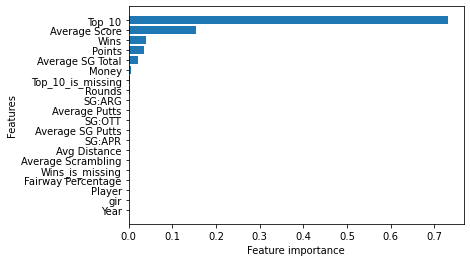

In [342]:
plot_features(X_train.columns, ideal_model.feature_importances_)

### Besides Wins and Top 10 finishes, the most important factors in winning are Average Score and Average SG Total
SG Total = Strokes Gained on average strokes of competitors.

Next step is to reformat the data to determine the "Best" from only the following categories:
* Average Putts
* Average Distance
* Average Scrambling
* gir(greens in regulation)
* Fairway Percentage

In [343]:
# We'll reformat the data that was converted into numerical values. Let's takke a look.
df_tmp.head().T

,2311,1607,1608,1609,1610
Player,234,170,325,457,456
Rounds,79.5,83,60,81,67
Fairway Percentage,61.43,62.16,62.06,61.96,61.9
Year,2010,2010,2010,2010,2010
Avg Distance,290.55,283.1,290.9,290.6,286.2
gir,65.79,67.8,64.75,67.49,65.52
Average Putts,29.14,28.93,28.93,29.53,30.03
Average Scrambling,58.275,63.2,57.61,56.33,50.38
Average Score,70.902,70.367,70.986,70.875,72.202
Points,0,929,461,768,798


In [344]:
# We'll drop all categories but the following: Fairway Percentage, Avg Distance, gir, Average Putts, Average Scrambling. We'll keep Year to split the data. This will be our X Data.
# We'll keep the Best category as are True Label (y target)

df2 = df_tmp[["Fairway Percentage", "Avg Distance", "gir", "Average Putts", "Average Scrambling", "Best", "Year"]]
df2.head().T

,2311,1607,1608,1609,1610
Fairway Percentage,61.430,62.16,62.06,61.96,61.90
Avg Distance,290.550,283.10,290.90,290.60,286.20
gir,65.790,67.80,64.75,67.49,65.52
Average Putts,29.140,28.93,28.93,29.53,30.03
Average Scrambling,58.275,63.20,57.61,56.33,50.38
Best,3.000,4.00,2.00,3.00,3.00
Year,2010.000,2010.00,2010.00,2010.00,2010.00


In [345]:
# Let's check our categories are still numerical
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 2311 to 0
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fairway Percentage  2312 non-null   float64
 1   Avg Distance        2312 non-null   float64
 2   gir                 2312 non-null   float64
 3   Average Putts       2312 non-null   float64
 4   Average Scrambling  2312 non-null   float64
 5   Best                2312 non-null   float64
 6   Year                2312 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 144.5 KB


In [346]:
len(df2)

2312

In [347]:
df2.Year

2311    2010
1607    2010
1608    2010
1609    2010
1610    2010
        ... 
166     2018
165     2018
164     2018
179     2018
0       2018
Name: Year, Length: 2312, dtype: int64

In [348]:
df2.Year.value_counts()

2011    264
2018    261
2012    261
2015    260
2014    259
2013    253
2017    252
2016    251
2010    251
Name: Year, dtype: int64

## Splitting data into train & test sets

In [349]:
# Split data into X and y
X = df2.drop("Best", axis=1)

y = df2["Best"]

In [350]:
X.head().T

,2311,1607,1608,1609,1610
Fairway Percentage,61.430,62.16,62.06,61.96,61.90
Avg Distance,290.550,283.10,290.90,290.60,286.20
gir,65.790,67.80,64.75,67.49,65.52
Average Putts,29.140,28.93,28.93,29.53,30.03
Average Scrambling,58.275,63.20,57.61,56.33,50.38
Year,2010.000,2010.00,2010.00,2010.00,2010.00


In [351]:
y.head().T

2311    3.0
1607    4.0
1608    2.0
1609    3.0
1610    3.0
Name: Best, dtype: float64

In [352]:
len(X), len(y)

(2312, 2312)

## Modelling

In [353]:
# Fitting the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [354]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

Wall time: 670 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [355]:
# Score the model
model.score(X_train, y_train)

0.9067168534368923

## Test Set for df2

In [357]:
model.fit(X_test, y_test)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [358]:
model.score(X_test, y_test)

0.8790534523926825

## Split Data into Train and Validation Sets

In [359]:
df2.Year

2311    2010
1607    2010
1608    2010
1609    2010
1610    2010
        ... 
166     2018
165     2018
164     2018
179     2018
0       2018
Name: Year, Length: 2312, dtype: int64

In [360]:
df2.Year.value_counts()

2011    264
2018    261
2012    261
2015    260
2014    259
2013    253
2017    252
2016    251
2010    251
Name: Year, dtype: int64

In [362]:
# Split data into training and validation
df2_val = df2[df2.Year == 2010]
df2_train = df2[df2.Year != 2010]

len(df2_val), len(df2_train)

(251, 2061)

In [363]:
# Split data into X & y
X_train, y_train = df2_train.drop("Best", axis=1), df2_train.Best
X_valid, y_valid = df2_val.drop("Best", axis=1), df2_val.Best

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2061, 6), (2061,), (251, 6), (251,))

In [364]:
y_train

1435    10.0
1420     2.0
1419     5.0
1418     3.0
1417     4.0
        ... 
166      3.0
165      2.0
164      6.0
179      3.0
0        6.0
Name: Best, Length: 2061, dtype: float64

In [365]:
# Re-Create an evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and True labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [366]:
show_scores(model)

{'Training MAE': 0.7883566982786094,
 'Valid MAE': 0.8142629482071713,
 'Training RMSLE': 0.2362640922811613,
 'Valid RMSLE': 0.2583936797334076,
 'Training R^2': 0.4308736834538579,
 'Valid R^2': 0.17838864687525025}

## Again RamdomizedSearchCV Hyperparameters re-tuning

In [367]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomizedForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(5,50,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1, "sqrt", "auto"],
          "max_samples": [1000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                   random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 7.01 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.8s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 5, 15, 25, 35, 45])},
                   verbose=True)

In [368]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 0.5,
 'max_depth': None}

In [369]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 0.635628242947034,
 'Valid MAE': 0.9530520047199501,
 'Training RMSLE': 0.1862815212118416,
 'Valid RMSLE': 0.284883347709453,
 'Training R^2': 0.6642086864490764,
 'Valid R^2': 0.07263419162098872}

## Train a model with the best hyperparameters
**Note:** These were found after 20 iterations of RandomizedSearchCV

In [370]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=25,
                                       min_samples_leaf=1,
                                       min_samples_split=10,
                                       max_features=0.5,
                                       n_jobs=1,
                                       max_samples=1000,
                                       max_depth=None,
                                       random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 103 ms


RandomForestRegressor(max_features=0.5, max_samples=1000, min_samples_split=10,
                      n_estimators=25, n_jobs=1, random_state=42)

In [371]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 0.635628242947034,
 'Valid MAE': 0.9530520047199501,
 'Training RMSLE': 0.1862815212118416,
 'Valid RMSLE': 0.284883347709453,
 'Training R^2': 0.6642086864490764,
 'Valid R^2': 0.07263419162098872}

In [372]:
# Scores on rs_model
show_scores(rs_model)

{'Training MAE': 0.635628242947034,
 'Valid MAE': 0.9530520047199501,
 'Training RMSLE': 0.1862815212118416,
 'Valid RMSLE': 0.284883347709453,
 'Training R^2': 0.6642086864490764,
 'Valid R^2': 0.07263419162098872}

In [373]:
# Make predictions on the test data
test_preds_X = ideal_model.predict(X)
test_preds_X

array([2.88196596, 6.99118759, 3.90272439, ..., 4.3461746 , 4.23331524,
       4.62965079])

In [374]:
X.shape

(2312, 6)

In [375]:
y.shape

(2312,)

In [376]:
ideal_model.feature_importances_

array([0.08720855, 0.17802375, 0.26743712, 0.24233218, 0.19292924,
       0.03206916])

In [377]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=6):
    df2 = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df2["features"][:n], df2["feature_importances"][:6])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

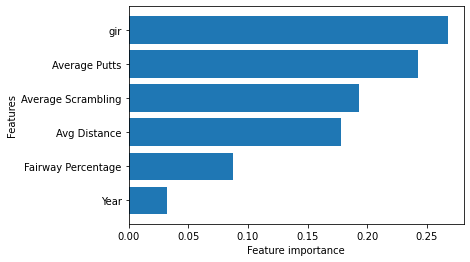

In [378]:
plot_features(X_train.columns, ideal_model.feature_importances_)

# According to the final model, gir(greens in regulation) are the most important feature when determing Wins and Top_10 finishes.
## Followed closely by Average Putts. Surprisingly, Fairway percentage was rather low.